In [4]:
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Draw, PandasTools, Descriptors
from rdkit.Chem.Draw import IPythonConsole
import numpy as np
import pandas as pd
import urllib.request 

In [111]:
url = 'https://raw.githubusercontent.com/HIPS/neural-fingerprint/master/data/2015-05-24-delaney/ci034243xsi20040112_053635.txt'
urllib.request.urlretrieve(url, 'water_solubility.txt') 
df = pd.read_csv('water_solubility.txt', sep=',') 
PandasTools.AddMoleculeColumnToFrame(frame=df, smilesCol='smiles')
df.columns = ['ID', 'm_sol', 'p_sol', 'SMILES', 'ROMol']

In [6]:
y=df['m_sol']

In [75]:
mols=[Chem.MolFromSmiles(smile) for smile in df['SMILES']]
maccskeys = []
for m in mols:
    maccskey = [x for x in AllChem.GetMACCSKeysFingerprint(m)]
    maccskeys.append(maccskey)
X = np.array(maccskeys)
X.shape

(1144, 167)

In [84]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(X[:100])
adj_m=nbrs.kneighbors_graph(X[:100], mode='connectivity').toarray()

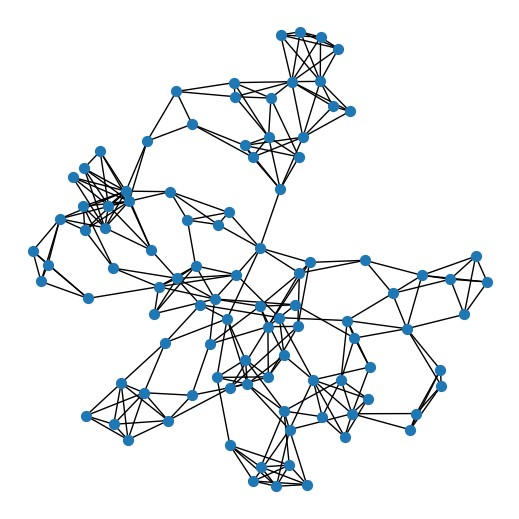

In [85]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.from_numpy_matrix(adj_m)
plt.figure(figsize=(5,5),dpi=100)
nx.draw_kamada_kawai(G,node_size=50,with_labels=False)
plt.show()

In [39]:
import matplotlib.colors as mcolors
def draw_h(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=list(measures.keys()))
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

<ipython-input-39-09520f65180c>:7: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))


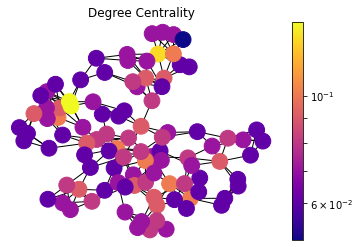

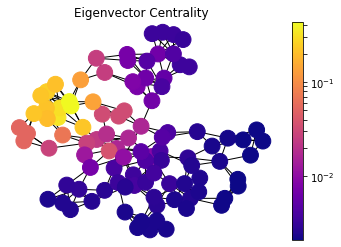

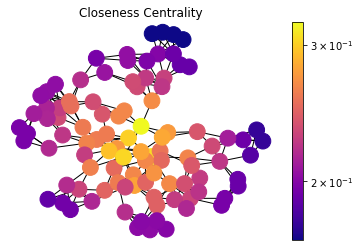

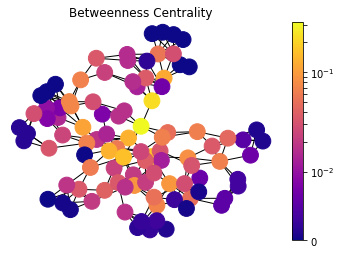

In [61]:
pos = nx.kamada_kawai_layout(G)
draw_h(G, pos, nx.degree_centrality(G), 'Degree Centrality')
draw_h(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')
draw_h(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')
draw_h(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')

In [62]:
degree_centrality = nx.degree_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

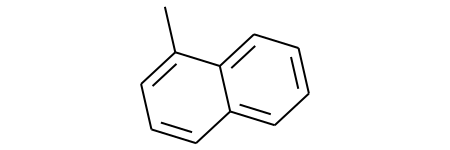

In [60]:
mols[max(degree_centrality, key=degree_centrality.get)]

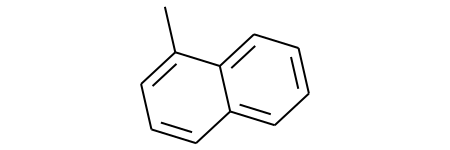

In [64]:
mols[max(eigenvector_centrality, key=eigenvector_centrality.get)]

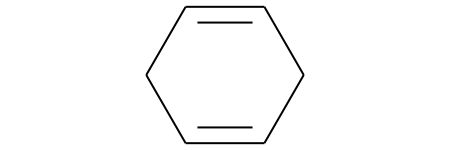

In [65]:
mols[max(closeness_centrality, key=closeness_centrality.get)]

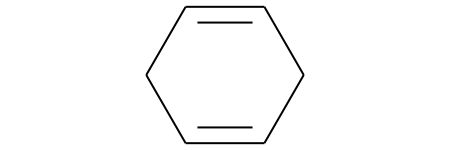

In [66]:
mols[max(betweenness_centrality, key=betweenness_centrality.get)]

In [83]:
nbrs_all = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(X)
adj_m_all=nbrs_all.kneighbors_graph(X, mode='connectivity').toarray()
G_all = nx.from_numpy_matrix(adj_m_all)

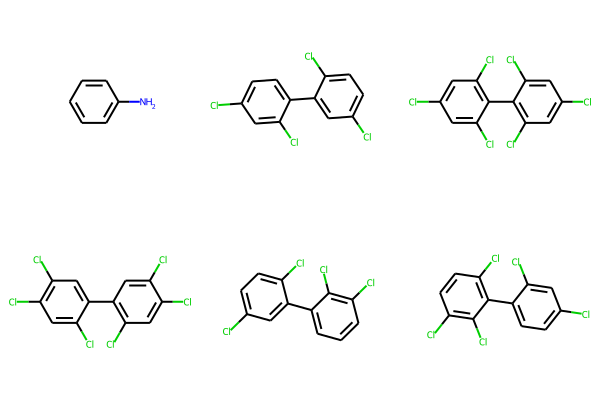

In [96]:
degree_centrality = pd.Series(nx.degree_centrality(G_all)).sort_values()
Draw.MolsToGridImage([mols[i] for i in degree_centrality.index[-6:]])

In [98]:
nx.density(G)

0.07454545454545454

In [97]:
nx.density(G_all)

0.006847701729591493

In [99]:
nx.average_clustering(G_all)

0.49703674593380465

In [104]:
from networkx.algorithms import community
communities_generator = community.centrality.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)

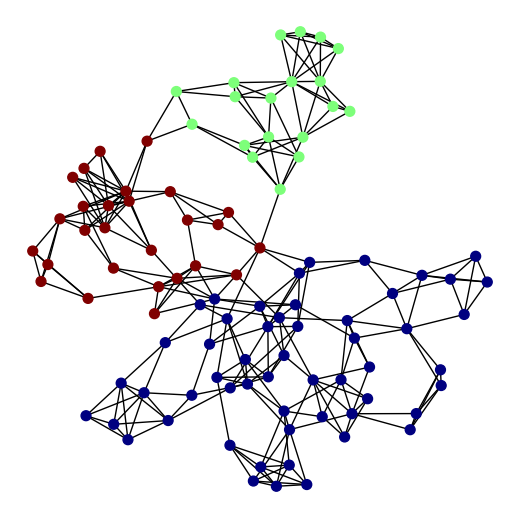

In [109]:
carac = pd.DataFrame({ 'ID':G.nodes(), 'myvalue':[0]*len(G.nodes())})
for m in range(len(next_level_communities)):
    for n in next_level_communities[m]:
        carac.loc[carac.ID == n, 'myvalue'] = m
carac['myvalue']=pd.Categorical(carac['myvalue'])
plt.figure(figsize=(5,5),dpi=100)
nx.draw_kamada_kawai(G, cmap = plt.get_cmap('jet'), node_color = carac['myvalue'], node_size=50, with_labels=False)
plt.show()

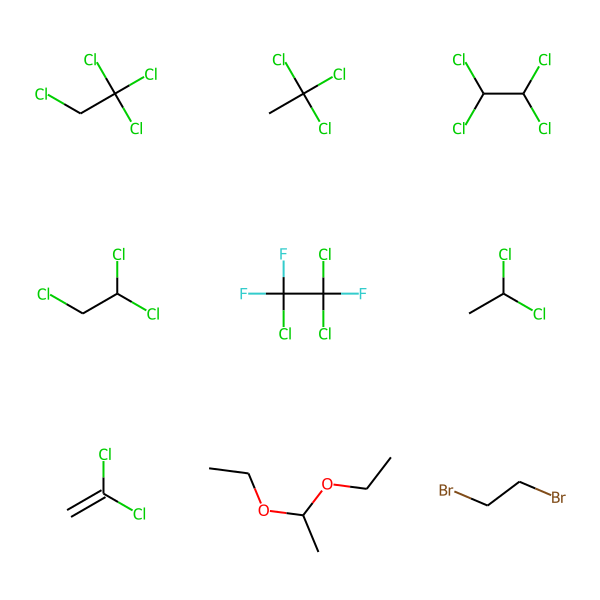

In [125]:
Draw.MolsToGridImage([mols[i] for i in carac[carac['myvalue']==0].index[:9]])

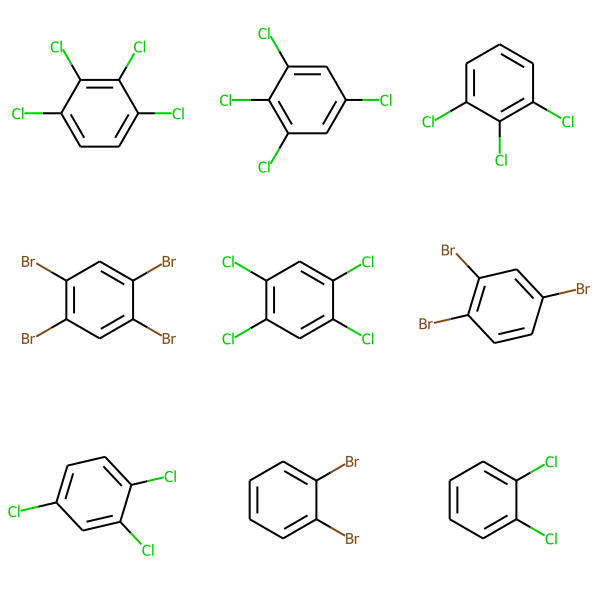

In [126]:
Draw.MolsToGridImage([mols[i] for i in carac[carac['myvalue']==1].index[:9]])

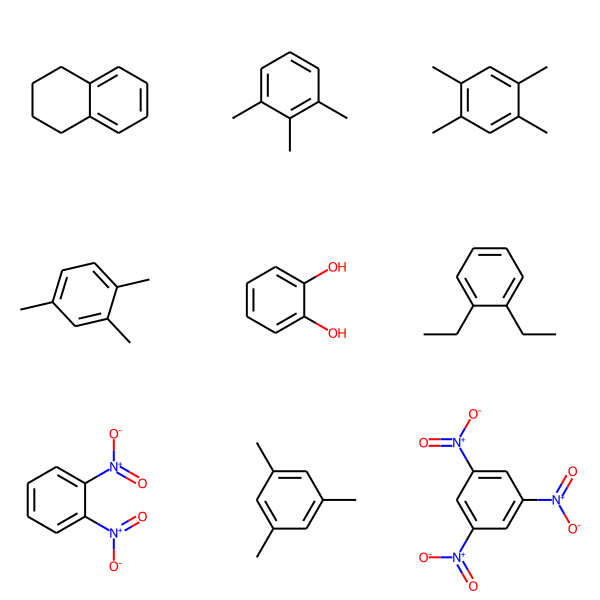

In [127]:
Draw.MolsToGridImage([mols[i] for i in carac[carac['myvalue']==2].index[:9]])